In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
x = np.load('C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/pizza/image_pixel_200.npy') # loading it

In [55]:
labels = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/pizza/df.csv",delimiter=',')

In [56]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [57]:
loaded_model.predict_classes(x[0:200])

array([3, 1, 0, 1, 1, 1, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 1, 0, 3, 1, 1, 1,
       3, 1, 3, 3, 0, 0, 0, 3, 2, 2, 1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 0, 0,
       2, 1, 1, 1, 3, 3, 2, 1, 2, 1, 2, 1, 1, 0, 1, 3, 3, 0, 1, 1, 2, 0,
       3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 0, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 0, 3, 2, 1, 1, 1, 1, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 3, 3, 0,
       2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 3, 0, 2, 1, 1, 2, 1, 1, 3, 0, 0,
       1, 1, 1, 2, 2, 3, 0, 1, 3, 1, 3, 3, 1, 3, 3, 3, 0, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 3,
       2, 1, 2, 1, 0, 2, 3, 1, 1, 0, 0, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1,
       3, 1], dtype=int64)

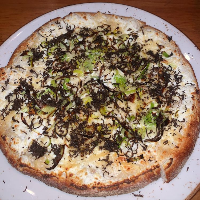

In [87]:
from tensorflow.keras.preprocessing import image
img_35 = image.array_to_img(x[131,:,:,:]) # the image data converted back to image to check if correct
img_35

In [59]:
columns = labels.columns[:7]
print(columns.shape)
print(columns)
labels.drop(columns,inplace=True,axis=1)
print(labels.head())

(7,)
Index(['photo_id', 'url', 'may_be', 'likes', 'timestamp', 'scraped_at',
       'diff'],
      dtype='object')
   tag_pizza  tag_chicken  tag_coffee  tag_salad
0          0            0           0          1
1          0            0           0          1
2          1            0           0          0
3          0            1           0          0
4          0            1           0          0


In [84]:
# Predict from the first three images in the test data
predict = loaded_model.predict(x[0:150])
print(predict.shape)

(150, 4)


In [88]:
predict[131]

array([0.3601653 , 0.26967883, 0.19208291, 0.17807297], dtype=float32)

<h1> Extracting a kernel from a trained model </h1>

In [89]:
c1 = loaded_model.layers[0]

In [90]:
weights1 =c1.get_weights()

In [91]:
kernel = weights1[0][...,0,0]

In [92]:
kernel

array([[-0.07689638,  0.04943324,  0.0310995 ],
       [ 0.06515717,  0.03883497,  0.02977245],
       [-0.09131175,  0.10493266,  0.09354997]], dtype=float32)

In [93]:
kernel.shape

(3, 3)

In [94]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

In [103]:
out = convolution(x[131,:,:,2],kernel)

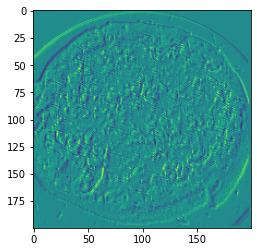

In [104]:
plt.imshow(out)
plt.show()